In [2]:
import numpy as np
%matplotlib widget 
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from tqdm import tqdm
import math

In [4]:
low = 1
high = 10
diff = high - low

A = np.random.random(size = (3))*diff + low
B = np.random.random(size = (3))*diff + low
C = np.random.random(size = (3))*diff + low

tr = [A,B,C]

pt_internes = []
for _ in range(10000):
    a = np.random.rand()
    b = np.random.rand()*(1-a)
    c = 1 - a - b
    New_pt = c*C + a*A + b*B
    pt_internes.append(New_pt)

In [102]:
def projection(Tr,P):
    "projete le point x sur le triangle tr"
    # On projette les deux points sur le plan du triangle et on s'assure que c'est dedans
    A = Tr[0]
    B = Tr[1]
    C = Tr[2]
    #Calcul du vecteur normal
    N = np.cross(B-A,B-C)
    n = N/np.linalg.norm(N)
    d = np.dot(n,P-A)
    return P - d*n

def area_of_triangle(Tr):
    "calcule l'aire d'un triangle array"
    p1, p2, p3 = Tr[0], Tr[1], Tr[2]
    return 0.5 * np.linalg.norm(np.cross(p2 - p1, p3 - p1))

def intersection(Tr,P,Q):
    "determine l'intersection entre PQ et le plan du triangle Tr "
    A = projection(Tr,P)
    B = projection(Tr,Q)
    # on che rche l'intersectionn entre BA et PQ
    a,a_p = tuple(list(B-A)[:2])
    b,b_p = tuple(list(P-Q)[:2])
    c,c_p = tuple(list(P-A)[:2])
    t = (a*c_p - a_p*c)/(a*b_p - a_p*b)
    lbda = (c*b_p - c_p*b)/(a*b_p - a_p*b)
    assert np.isclose(P +t*(Q-P), A+lbda*(B-A)).all() , "error in the code"
    return P +t*(Q-P)


def is_inside(Tr,P): 
    "determine si un point P est à l'intérieur d'un triangle Tr"
    A, B, C = Tr[0], Tr[1], Tr[2]
    Tr1 = [A,B,P]
    Tr2 = [A,C,P]
    Tr3 = [B,C,P]
    Somme = area_of_triangle(Tr1) + area_of_triangle(Tr2) + area_of_triangle(Tr3)
    Total = area_of_triangle(Tr)
    # assert(Total <= Somme), "Error dans le test"
    return np.isclose(Somme ,Total)

def traverse(Tr,P,Q):
    "determine si PQ traverse Tr"
    # les points P et Q  doivent etre dans deux sens opposés de de tr
    P_proj = projection(Tr,P)
    Q_proj = projection(Tr,Q)
    n_P = (P - P_proj)
    n_Q = (Q - Q_proj)
    if np.dot(n_P,n_Q) > 0 :
        return False
    Z = intersection(Tr,P,Q)
    return is_inside(Tr,Z) 



## Visualize and test the method

(1.3763619714440214, 7.249284208470838)

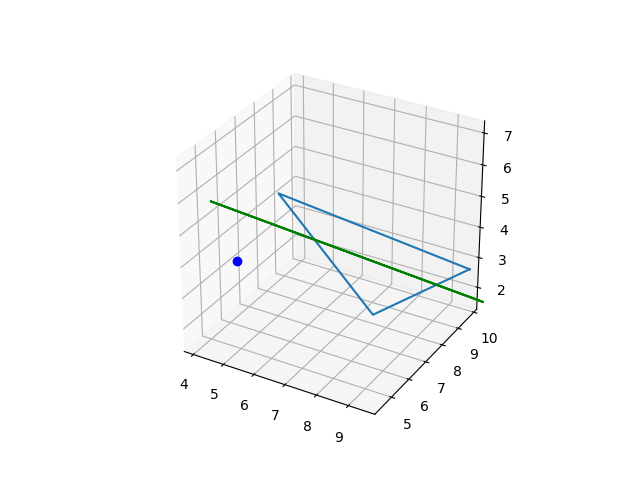

In [104]:
X,Y,Z = [],[],[]
P = np.random.random(size = 3)*10 + 1
P_proj = projection(tr,P)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_aspect('equal')


xs = [ind[0] for ind in tr] + [tr[0][0]]
ys = [ind[1] for ind in tr] + [tr[0][1]]
zs = [ind[2] for ind in tr] + [tr[0][2]]
ax.plot(xs,ys,zs)

X = X + list(xs)
Y = Y + list(ys)
Z = Z + list(zs)

# for pt in K[300:301]:
#     ax.plot(pt[0],pt[1],pt[2],"x", color = "red")
#     X.append(pt[0])
#     Y.append(pt[1])
#     Z.append(pt[2])

Q = K[300]
ax.plot([P[0],Q[0],P[0]],[P[1],Q[1],P[1]],[P[2],Q[2],P[2]], color = "green")
X.append(P[0])
Y.append(P[1])
Z.append(P[2])
ax.plot(P_proj[0],P_proj[1],P_proj[2],"o",color ="blue")
X = np.array(X)
Y = np.array(Y)
Z = np.array(Z)
max_range = np.array([X.max()-X.min(), Y.max()-Y.min(), Z.max()-Z.min()]).max() / 2.0 

mid_x = (X.max()+X.min()) * 0.5
mid_y = (Y.max()+Y.min()) * 0.5
mid_z = (Z.max()+Z.min()) * 0.5

ax.grid(True)

ax.set_xlim(mid_x - max_range, mid_x + max_range)
ax.set_ylim(mid_y - max_range, mid_y + max_range)
ax.set_zlim(mid_z - max_range, mid_z + max_range)

In [73]:
cpt = 0
#Calcul du vecteur normal
N = np.cross(B-A,B-C)
n = N/np.linalg.norm(N)
K = []
for i in pt_internes:
    i = i + 10*(1- 2*np.random.rand())*n
    K.append(i)
    if not in_prism(tr,i):
        print("Error")
        cpt = cpt + 1

## Apply it to mesh